# 100. Boston House Price Regression

- 보스턴 주택가격 예측

### 13 개의 종속변수와 1 개의 독립변수 (주택가격 중앙값) 으로 구성

#### 종속변수 (13 개)
CRIM 자치시(town) 별 1인당 범죄율  
ZN 25,000 평방피트를 초과하는 거주지역의 비율  
INDUS 비소매상업지역이 점유하고 있는 토지의 비율  
CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)  
NOX 10ppm 당 농축 일산화질소  
RM 주택 1가구당 평균 방의 개수  
AGE 1940년 이전에 건축된 소유주택의 비율  
DIS 5개의 보스턴 직업센터까지의 접근성 지수  
RAD 방사형 도로까지의 접근성 지수  
TAX 10,000 달러 당 재산세율  
PTRATIO 자치시(town)별 학생/교사 비율  
B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함  
LSTAT 모집단의 하위계층의 비율(%)   

#### 독립변수 (1 개)
MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)  

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_boston = pd.read_csv("boston_house.csv", index_col=0)
boston = df_boston.drop('MEDV', axis=1)
target = df_boston.pop('MEDV')

In [3]:
X = boston.values
y = target.values

In [4]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [5]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [8]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### model build

In [9]:
model = Sequential()

model.add(Dense(64, input_shape=(13,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam', 
              metrics=['mae', 'mse'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- epoch 수와 batchz_size 변경하며 test

In [12]:
history = model.fit(X_train, y_train, batch_size=32, 
                    epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 14ms/step - loss: 571.0994 - mae: 22.1172 - mse: 571.0994 - val_loss: 557.8432 - val_mae: 21.5103 - val_mse: 557.8432
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 545.6174 - mae: 21.5136 - mse: 545.6174 - val_loss: 528.4251 - val_mae: 20.7954 - val_mse: 528.4251
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 511.0599 - mae: 20.6613 - mse: 511.0599 - val_loss: 486.3776 - val_mae: 19.7215 - val_mse: 486.3776
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 461.5382 - mae: 19.3507 - mse: 461.5382 - val_loss: 425.5090 - val_mae: 18.0494 - val_mse: 425.5090
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 391.1913 - mae: 17.3621 - mse: 391.1913 - val_loss: 344.9681 - val_mae: 15.5403 - val_mse: 344.9681
Epoch 6/500
12/12 [==============================] - 0s 3ms/step - loss: 305.1437 - mae: 14.6904 - mse: 305.1437 - val_loss: 254.9517 

12/12 [==============================] - 0s 3ms/step - loss: 24.6099 - mae: 3.4636 - mse: 24.6099 - val_loss: 30.6553 - val_mae: 3.7233 - val_mse: 30.6553
Epoch 50/500
12/12 [==============================] - 0s 4ms/step - loss: 23.9804 - mae: 3.4225 - mse: 23.9804 - val_loss: 30.2694 - val_mae: 3.5952 - val_mse: 30.2694
Epoch 51/500
12/12 [==============================] - 0s 3ms/step - loss: 23.6366 - mae: 3.3929 - mse: 23.6366 - val_loss: 29.4744 - val_mae: 3.5903 - val_mse: 29.4744
Epoch 52/500
12/12 [==============================] - 0s 3ms/step - loss: 23.2298 - mae: 3.3743 - mse: 23.2298 - val_loss: 28.8710 - val_mae: 3.5542 - val_mse: 28.8710
Epoch 53/500
12/12 [==============================] - 0s 4ms/step - loss: 23.0056 - mae: 3.3279 - mse: 23.0056 - val_loss: 28.2770 - val_mae: 3.5044 - val_mse: 28.2770
Epoch 54/500
12/12 [==============================] - 0s 3ms/step - loss: 22.5773 - mae: 3.3134 - mse: 22.5773 - val_loss: 27.8519 - val_mae: 3.4470 - val_mse: 27.8519
Epoch

Epoch 98/500
12/12 [==============================] - 0s 3ms/step - loss: 17.7960 - mae: 2.8656 - mse: 17.7960 - val_loss: 20.0737 - val_mae: 2.8549 - val_mse: 20.0737
Epoch 99/500
12/12 [==============================] - 0s 3ms/step - loss: 17.7976 - mae: 2.8625 - mse: 17.7976 - val_loss: 20.0496 - val_mae: 2.8210 - val_mse: 20.0496
Epoch 100/500
12/12 [==============================] - 0s 3ms/step - loss: 17.6609 - mae: 2.8905 - mse: 17.6609 - val_loss: 19.7553 - val_mae: 2.8385 - val_mse: 19.7553
Epoch 101/500
12/12 [==============================] - 0s 3ms/step - loss: 17.6258 - mae: 2.8389 - mse: 17.6258 - val_loss: 20.1400 - val_mae: 2.7985 - val_mse: 20.1400
Epoch 102/500
12/12 [==============================] - 0s 3ms/step - loss: 18.2920 - mae: 2.9756 - mse: 18.2920 - val_loss: 19.4408 - val_mae: 2.8344 - val_mse: 19.4408
Epoch 103/500
12/12 [==============================] - 0s 3ms/step - loss: 17.5375 - mae: 2.7999 - mse: 17.5375 - val_loss: 20.3005 - val_mae: 2.7933 - val_m

12/12 [==============================] - 0s 3ms/step - loss: 15.4665 - mae: 2.6408 - mse: 15.4665 - val_loss: 16.6052 - val_mae: 2.6387 - val_mse: 16.6052
Epoch 147/500
12/12 [==============================] - 0s 3ms/step - loss: 15.3393 - mae: 2.7146 - mse: 15.3393 - val_loss: 16.7499 - val_mae: 2.5717 - val_mse: 16.7499
Epoch 148/500
12/12 [==============================] - 0s 3ms/step - loss: 15.7391 - mae: 2.6319 - mse: 15.7391 - val_loss: 16.7246 - val_mae: 2.5887 - val_mse: 16.7246
Epoch 149/500
12/12 [==============================] - 0s 3ms/step - loss: 15.3235 - mae: 2.7433 - mse: 15.3235 - val_loss: 16.3310 - val_mae: 2.6075 - val_mse: 16.3310
Epoch 150/500
12/12 [==============================] - 0s 3ms/step - loss: 15.1897 - mae: 2.6168 - mse: 15.1897 - val_loss: 16.5309 - val_mae: 2.5538 - val_mse: 16.5309
Epoch 151/500
12/12 [==============================] - 0s 3ms/step - loss: 15.2868 - mae: 2.6138 - mse: 15.2868 - val_loss: 16.6468 - val_mae: 2.5574 - val_mse: 16.6468


12/12 [==============================] - 0s 3ms/step - loss: 13.4022 - mae: 2.5020 - mse: 13.4022 - val_loss: 14.3128 - val_mae: 2.3934 - val_mse: 14.3128
Epoch 195/500
12/12 [==============================] - 0s 3ms/step - loss: 13.3463 - mae: 2.4853 - mse: 13.3463 - val_loss: 14.4043 - val_mae: 2.3906 - val_mse: 14.4043
Epoch 196/500
12/12 [==============================] - 0s 3ms/step - loss: 13.3774 - mae: 2.4558 - mse: 13.3774 - val_loss: 13.8421 - val_mae: 2.4237 - val_mse: 13.8421
Epoch 197/500
12/12 [==============================] - 0s 3ms/step - loss: 13.5959 - mae: 2.5610 - mse: 13.5959 - val_loss: 14.3831 - val_mae: 2.3804 - val_mse: 14.3831
Epoch 198/500
12/12 [==============================] - 0s 3ms/step - loss: 13.5961 - mae: 2.4817 - mse: 13.5961 - val_loss: 13.8061 - val_mae: 2.3992 - val_mse: 13.8061
Epoch 199/500
12/12 [==============================] - 0s 3ms/step - loss: 13.2469 - mae: 2.4892 - mse: 13.2469 - val_loss: 14.2857 - val_mae: 2.3839 - val_mse: 14.2857


12/12 [==============================] - 0s 3ms/step - loss: 11.6538 - mae: 2.3711 - mse: 11.6538 - val_loss: 12.6808 - val_mae: 2.3251 - val_mse: 12.6808
Epoch 243/500
12/12 [==============================] - 0s 3ms/step - loss: 11.5344 - mae: 2.3105 - mse: 11.5344 - val_loss: 12.5151 - val_mae: 2.3270 - val_mse: 12.5151
Epoch 244/500
12/12 [==============================] - 0s 3ms/step - loss: 11.5411 - mae: 2.3474 - mse: 11.5411 - val_loss: 12.3009 - val_mae: 2.2960 - val_mse: 12.3009
Epoch 245/500
12/12 [==============================] - 0s 3ms/step - loss: 11.4304 - mae: 2.3286 - mse: 11.4304 - val_loss: 12.7945 - val_mae: 2.3074 - val_mse: 12.7945
Epoch 246/500
12/12 [==============================] - 0s 3ms/step - loss: 11.3880 - mae: 2.2896 - mse: 11.3880 - val_loss: 12.6263 - val_mae: 2.3179 - val_mse: 12.6263
Epoch 247/500
12/12 [==============================] - 0s 3ms/step - loss: 11.5626 - mae: 2.4111 - mse: 11.5626 - val_loss: 12.7527 - val_mae: 2.3112 - val_mse: 12.7527


12/12 [==============================] - 0s 3ms/step - loss: 10.2274 - mae: 2.2127 - mse: 10.2274 - val_loss: 11.4082 - val_mae: 2.2571 - val_mse: 11.4082
Epoch 291/500
12/12 [==============================] - 0s 3ms/step - loss: 10.0609 - mae: 2.2451 - mse: 10.0609 - val_loss: 11.7180 - val_mae: 2.2344 - val_mse: 11.7180
Epoch 292/500
12/12 [==============================] - 0s 3ms/step - loss: 10.0881 - mae: 2.2099 - mse: 10.0881 - val_loss: 11.2388 - val_mae: 2.2068 - val_mse: 11.2388
Epoch 293/500
12/12 [==============================] - 0s 3ms/step - loss: 10.1874 - mae: 2.1936 - mse: 10.1874 - val_loss: 11.4077 - val_mae: 2.2647 - val_mse: 11.4077
Epoch 294/500
12/12 [==============================] - 0s 3ms/step - loss: 10.1490 - mae: 2.2453 - mse: 10.1490 - val_loss: 11.6302 - val_mae: 2.2191 - val_mse: 11.6302
Epoch 295/500
12/12 [==============================] - 0s 3ms/step - loss: 9.9663 - mae: 2.2410 - mse: 9.9663 - val_loss: 11.1279 - val_mae: 2.1963 - val_mse: 11.1279
Ep

12/12 [==============================] - 0s 3ms/step - loss: 8.6850 - mae: 2.0759 - mse: 8.6850 - val_loss: 10.3845 - val_mae: 2.1399 - val_mse: 10.3845
Epoch 340/500
12/12 [==============================] - 0s 3ms/step - loss: 8.5994 - mae: 2.0840 - mse: 8.5994 - val_loss: 10.6205 - val_mae: 2.1264 - val_mse: 10.6205
Epoch 341/500
12/12 [==============================] - 0s 3ms/step - loss: 8.5776 - mae: 2.0603 - mse: 8.5776 - val_loss: 10.5662 - val_mae: 2.2117 - val_mse: 10.5662
Epoch 342/500
12/12 [==============================] - 0s 3ms/step - loss: 8.6933 - mae: 2.1385 - mse: 8.6933 - val_loss: 10.5051 - val_mae: 2.1207 - val_mse: 10.5051
Epoch 343/500
12/12 [==============================] - 0s 3ms/step - loss: 8.5608 - mae: 2.0531 - mse: 8.5608 - val_loss: 10.5067 - val_mae: 2.1395 - val_mse: 10.5067
Epoch 344/500
12/12 [==============================] - 0s 3ms/step - loss: 8.5465 - mae: 2.0842 - mse: 8.5465 - val_loss: 10.2867 - val_mae: 2.1137 - val_mse: 10.2867
Epoch 345/50

12/12 [==============================] - 0s 3ms/step - loss: 7.9340 - mae: 1.9756 - mse: 7.9340 - val_loss: 10.6380 - val_mae: 2.2258 - val_mse: 10.6380
Epoch 389/500
12/12 [==============================] - 0s 4ms/step - loss: 7.8003 - mae: 2.0436 - mse: 7.8003 - val_loss: 10.9534 - val_mae: 2.2425 - val_mse: 10.9534
Epoch 390/500
12/12 [==============================] - 0s 3ms/step - loss: 7.8377 - mae: 2.0103 - mse: 7.8377 - val_loss: 10.2886 - val_mae: 2.2069 - val_mse: 10.2886
Epoch 391/500
12/12 [==============================] - 0s 3ms/step - loss: 7.6972 - mae: 2.0079 - mse: 7.6972 - val_loss: 10.1771 - val_mae: 2.1262 - val_mse: 10.1771
Epoch 392/500
12/12 [==============================] - 0s 3ms/step - loss: 7.6228 - mae: 1.9841 - mse: 7.6228 - val_loss: 10.1567 - val_mae: 2.1305 - val_mse: 10.1567
Epoch 393/500
12/12 [==============================] - 0s 3ms/step - loss: 7.6577 - mae: 1.9737 - mse: 7.6577 - val_loss: 9.8756 - val_mae: 2.1163 - val_mse: 9.8756
Epoch 394/500


12/12 [==============================] - 0s 3ms/step - loss: 6.8513 - mae: 1.8932 - mse: 6.8513 - val_loss: 9.9259 - val_mae: 2.1142 - val_mse: 9.9259
Epoch 438/500
12/12 [==============================] - 0s 3ms/step - loss: 6.8085 - mae: 1.8981 - mse: 6.8085 - val_loss: 10.0061 - val_mae: 2.1156 - val_mse: 10.0061
Epoch 439/500
12/12 [==============================] - 0s 3ms/step - loss: 6.8512 - mae: 1.9100 - mse: 6.8512 - val_loss: 9.9797 - val_mae: 2.1184 - val_mse: 9.9797
Epoch 440/500
12/12 [==============================] - 0s 4ms/step - loss: 6.8645 - mae: 1.8957 - mse: 6.8645 - val_loss: 9.9449 - val_mae: 2.1317 - val_mse: 9.9449
Epoch 441/500
12/12 [==============================] - 0s 3ms/step - loss: 6.8262 - mae: 1.9020 - mse: 6.8262 - val_loss: 9.8184 - val_mae: 2.1211 - val_mse: 9.8184
Epoch 442/500
12/12 [==============================] - 0s 3ms/step - loss: 6.9768 - mae: 1.9183 - mse: 6.9768 - val_loss: 10.2628 - val_mae: 2.1447 - val_mse: 10.2628
Epoch 443/500
12/12 

12/12 [==============================] - 0s 3ms/step - loss: 6.1768 - mae: 1.8226 - mse: 6.1768 - val_loss: 9.9632 - val_mae: 2.1341 - val_mse: 9.9632
Epoch 487/500
12/12 [==============================] - 0s 3ms/step - loss: 6.1421 - mae: 1.8364 - mse: 6.1421 - val_loss: 10.1608 - val_mae: 2.1624 - val_mse: 10.1608
Epoch 488/500
12/12 [==============================] - 0s 3ms/step - loss: 6.2303 - mae: 1.8159 - mse: 6.2303 - val_loss: 9.9216 - val_mae: 2.1253 - val_mse: 9.9216
Epoch 489/500
12/12 [==============================] - 0s 3ms/step - loss: 6.1550 - mae: 1.8329 - mse: 6.1550 - val_loss: 9.9810 - val_mae: 2.1318 - val_mse: 9.9810
Epoch 490/500
12/12 [==============================] - 0s 3ms/step - loss: 6.1745 - mae: 1.8216 - mse: 6.1745 - val_loss: 10.0819 - val_mae: 2.1717 - val_mse: 10.0819
Epoch 491/500
12/12 [==============================] - 0s 3ms/step - loss: 6.5079 - mae: 1.8909 - mse: 6.5079 - val_loss: 10.1214 - val_mae: 2.1571 - val_mse: 10.1214
Epoch 492/500
12/1

In [13]:
model.evaluate(X_test, y_test, verbose=0)

[9.810880661010742, 2.112252712249756, 9.810880661010742]

In [14]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [15]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 9.81
R2 score: 0.90


Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

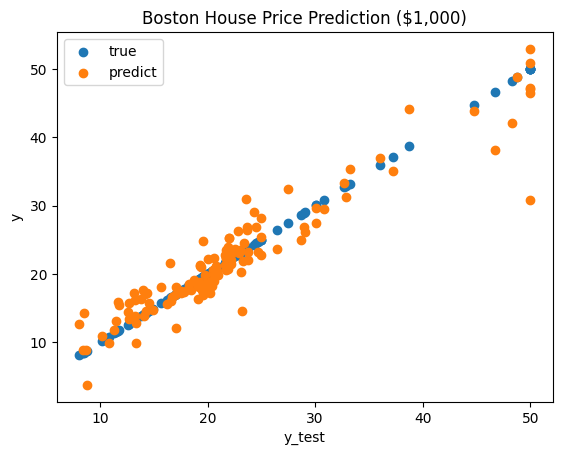

In [16]:
plt.scatter(y_test, y_test, label='true')
plt.scatter(y_test, y_pred, label='predict')
plt.xlabel('y_test')
plt.ylabel('y')
plt.legend()
plt.title('Boston House Price Prediction ($1,000)')

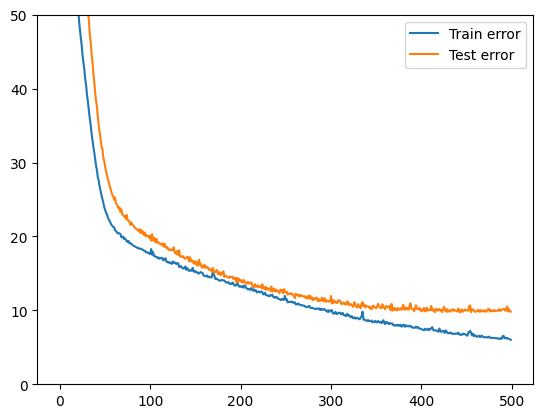

In [17]:
plt.plot(history.history['mse'], label='Train error')
plt.plot(history.history['val_mse'], label='Test error')
plt.ylim([0, 50])
plt.legend()

## sklearn LinearRegression 비교

In [18]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [19]:
regr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = regr.predict(X_test)

In [21]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -9.35517613   4.38940758   0.21001648   3.49570954  -6.56219005
  20.62963503   0.71345268 -14.10404399   7.13578379  -5.80129643
  -8.51879952   4.46524594 -20.91156704]
Intercept: 
 23.746761346845


In [22]:
# MSE(mean squared error) 계산
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# R2 계산 
print("R2 score: {:.2f}".format(r2_score(y_test, y_pred)))

Mean squared error: 27.37
R2 score: 0.66


In [23]:
y_test.shape, y_pred.shape

((127,), (127,))

Text(0.5, 1.0, 'Boston House Price Prediction ($1,000)')

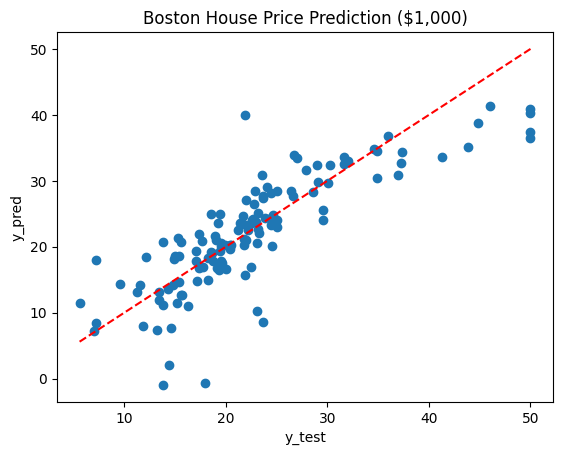

In [24]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Boston House Price Prediction ($1,000)')

## 실습

### UCI Machine Learning Repository 의 Auto MPG dataset 을 사용하여 자동차 연비 예측 Regression model 작성

- auto-mpg.data - data file  


- auto-mpg.names - data 설명 file

    1. mpg:           continuous  
    2. cylinders:     multi-valued discrete  
    3. displacement:  continuous (배기량)   
    4. horsepower:    continuous  
    5. weight:        continuous  
    6. acceleration:  continuous  
    7. model year:    multi-valued discrete  
    8. origin:        multi-valued discrete, 1 - USA, 2 - Europe, 3 - Japan  
    9. car name:      string (unique for each instance)  

Missing Attribute Values:  horsepower has 6 missing values  ==> "?" 로 들어 있으므로 read_csv 시 nan 으로 변환

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Data load 및 Preprocessing

In [26]:
data_path = tf.keras.utils.get_file("auto-mpg.data", 
        "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

rawdata = pd.read_csv(data_path, names=column_names, na_values="?", comment="\t", sep=" ", skipinitialspace=True)

rawdata.dropna(inplace=True)

data = rawdata.copy()

data = pd.get_dummies(data, columns=['cylinders', 'origin'])

label = data.pop('mpg')

X_train, X_test, y_train, y_test = train_test_split(data.values, label.values)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Regression Model Build

### train

### predict

### $r^2$ 계산

### 시각화